In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
a = pickle.load(open("./output/3/sp500_train50000_test2000_repeat100_withsold_19JAN2020-0.out", "rb"))
b = pickle.load(open("./output/3/sp500_train50000_test2000_repeat100_withsold_19JAN2020-1.out", "rb"))
c = pickle.load(open("./output/3/sp500_train50000_test2000_repeat100_withsold_19JAN2020-2.out", "rb"))
d = pickle.load(open("./output/3/sp500_train50000_test2000_repeat100_withsold_19JAN2020-3.out", "rb"))
e = pickle.load(open("./output/3/sp500_train50000_test2000_repeat100_withsold_19JAN2020-4.out", "rb"))
f = pickle.load(open("./output/3/sp500_train50000_test2000_repeat100_withsold_19JAN2020-5.out", "rb"))

In [24]:
len(pickle.load(open("./output/3/sp500_train50000_test2000_repeat100_withsold_19JAN2020-5.out", "rb")))

19

In [26]:
result = a+b+c+d+e+f

In [27]:
result = result[:100]

In [28]:
avg_list = [tmp['mean'] for tmp in result]
len(avg_list)

100

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  5.,  1.,  5., 38., 22.,
        10.,  3.,  9.,  3.,  1.,  0.,  1.]),
 array([-3437.08415148, -3148.82017374, -2860.556196  , -2572.29221826,
        -2284.02824052, -1995.76426278, -1707.50028504, -1419.23630729,
        -1130.97232955,  -842.70835181,  -554.44437407,  -266.18039633,
           22.08358141,   310.34755915,   598.61153689,   886.87551463,
         1175.13949237,  1463.40347011,  1751.66744785,  2039.93142559,
         2328.19540333]),
 <a list of 20 Patch objects>)

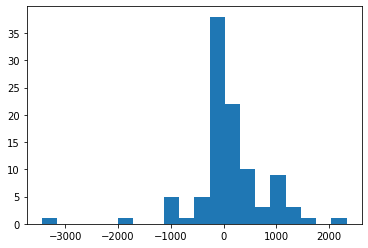

In [29]:
plt.hist(avg_list, bins=20)

In [30]:
pickle.dump(result, open("./output/3/sp500_train50000_test2000_repeat100_withsold_21JAN2020_ALL.out", "wb"))

In [31]:
result_df = pd.DataFrame(result)
result_df.to_csv("./output/3/sp500_train50000_test2000_repeat100_withsold_21JAN2020_ALL.csv")

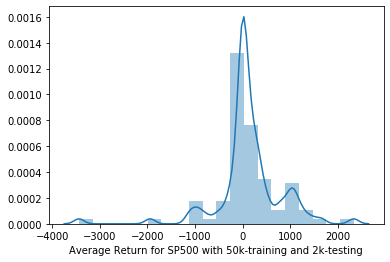

In [32]:
avg_series = pd.Series(avg_list, name="Average Return for SP500 with 50k-training and 2k-testing")
sns.distplot(avg_series, bins=20);

[]

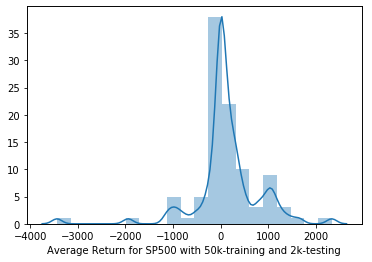

In [33]:
# Plotting hist without kde
ax = sns.distplot(avg_series, kde=False, bins=20)

# Creating another Y axis
second_ax = ax.twinx()

#Plotting kde without hist on the second Y axis
sns.distplot(avg_series, ax=second_ax, kde=True, hist=False, bins=20)

#Removing Y ticks from the second axis
second_ax.set_yticks([])

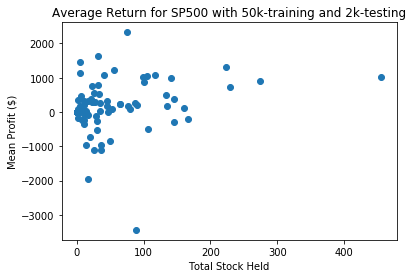

In [34]:
plt.scatter(result_df['total_shares_sold'], result_df['mean'])
plt.title("Average Return for SP500 with 50k-training and 2k-testing")
plt.xlabel("Total Stock Held")
plt.ylabel("Mean Profit ($)")
plt.show()